<div class="alert alert-success">
<h3> Will be transated...</h3>

</div>

## Анализ предпочтений пассажиров авиакомпании F9, выполняющей внутренние пассажирские перевозки.
---
В данном исследовании проведен анализ спроса пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали. Источником информации для исследования была база данных авиакомпании.

Основные задачи исследования.

1) Построение графиков зависимостей:
- количества рейсов от модели самолета в сентябре 2018 г.
- среднего количества рейсов в день от города прибытия в сентябре 2018 г.
- среднего количества рейсов в день в топ-10 городах в сентябре 2018 г.

2) Проверка гипотезы: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

---
<a id='the_contents'></a>
#### Исследование состоит из 3 частей.

##### Часть 1. Аналитика.
* [1.1 Импорт библиотек.](#the_part_1.1)
* [1.2 Загрузка файлов.](#the_part_1.2)
* [1.3 Изучение общей информации.](#the_part_1.3)
* [1.4 Зависимость количества рейсов от модели самолета.](#the_part_1.4)
* [1.5 Зависимость среднего количества рейсов в день от города прибытия.](#the_part_1.5)
* [1.6 Зависимость среднего количества рейсов в день топ-10 городах.](#the_part_1.6)

##### Часть 2. Проверка гипотезы.
* [2.1 Формирование данных.](#the_part_2.1)
* [2.2 Формулировка гипотез и проверка.](#the_part_2.2)

##### Часть 3. Заключение.
* [Выводы по исследованию.](#the_part_3)
---

# 1. Аналитика

<a id='the_part_1.1'></a>
### 1.1 Импорт библиотек

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import stats as st

In [2]:
# Отключаем уведомления
pd.options.mode.chained_assignment = None  # default='warn'

<a id='the_part_1.2'></a>
### 1.2 Загрузка файлов

In [3]:
# Загружаем файл данных
try:
    df_acr = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Проект11\query_1.csv')
    df_flt = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Проект11\query_3.csv')
    df_tic = pd.read_csv(r'D:\Docs\Documents\ЯПрактикум\Проект11\query_last.csv')
except:
    df_acr = pd.read_csv('https://C:/datasets/query_1.csv')
    df_flt = pd.read_csv('https://C:/datasets/query_3.csv')
    df_tic = pd.read_csv('https://C:/datasets/query_last.csv')

<a id='the_part_1.3'></a>
### 1.3 Изучение общей информации

In [4]:
# Выводим обзорную информацию
display(df_acr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

In [5]:
# Смотрим на датафрейм
df_acr

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [6]:
# Выводим обзорную информацию
display(df_flt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

In [7]:
# Смотрим на датафрейм
df_flt

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [8]:
# Выводим обзорную информацию
df_tic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [9]:
# Смотрим на датафрейм
df_tic

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


In [10]:
# Определим функцию анализа пропущенных данных
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total missing data', 'Percent missing data'])

# Поиск пропущенных данных в таблице с полетами
display(missing_data(df_flt)) 

# Поиск дубликатов
print('Дубликаты:', df_flt.duplicated().sum())

,Total missing data,Percent missing data
average_flights,0,0.0
city,0,0.0


Дубликаты: 0


In [11]:
# Смотрим статистические характеристики количественных переменных
display(df_flt.describe().T)

,count,mean,std,min,25%,50%,75%,max
average_flights,101.0,5.494189,13.11979,1.0,2.0,3.0,5.870968,129.774194


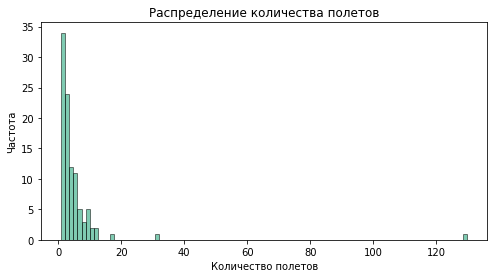

In [12]:
# Строим гистограмму распределения
plt.figure(figsize=(8, 4))
plt.hist(df_flt['average_flights'], color = '#009966', alpha = 0.5, edgecolor = 'black',  bins = 100)
plt.title('Распределение количества полетов')
plt.xlabel('Количество полетов')
plt.ylabel('Частота')
plt.show()

#### Выводы:
- Исходные данные корректны, не имеют пропусков и дубликатов, типы данных сооответствуют содержимому (пропуски в таблице с фестивалями не учитываем, таблица будет разделена по признаку проведения фестиваля)
- Среднее количество полетов по городам больше медианы, распределение скошено вправо

<a id='the_part_1.4'></a>
### 1.4 Зависимость количества рейсов от модели самолета в сентябре 2018 года

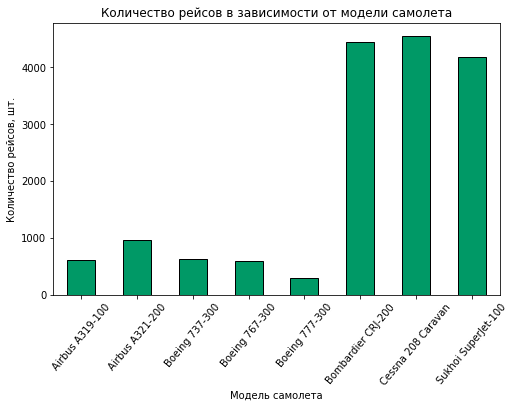

In [13]:
# Построим столбчатую диаграмму
df_acr.plot(kind='bar', x=('model'), y=('flights_amount'), figsize=(8, 5), color='#009966', label=None, edgecolor = 'black')

# Декорации
plt.title('Количество рейсов в зависимости от модели самолета')
plt.xlabel('Модель самолета')
plt.xticks(rotation=50)
plt.ylabel('Количество рейсов, шт.')
plt.legend().remove()
plt.show()

#### Выводы:
- Количество полетов находится в обратной зависимости от размера (дальности полета) самолета, чем крупнее самолет, тем меньше полетов
- Sukhoi SuperJet-100, несмотря на значительно большие размеры, чем Bombardier CRJ-200 и Cessna 208 Caravan,	имеет сопоставимое количество полетов - около 4000

<a id='the_part_1.5'></a>
### 1.5 Зависимость среднего количества рейсов в день от города прибытия в сентябре 2018 года

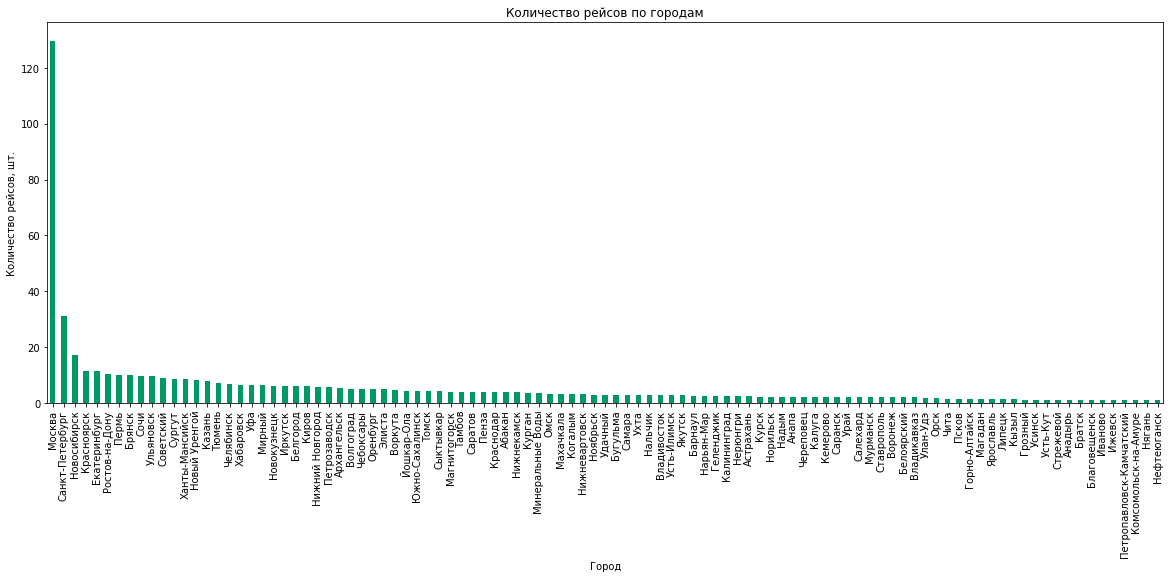

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581


In [14]:
# Построим столбчатую диаграмму
df_flt_sort = df_flt.sort_values(by='average_flights', ascending=False)
df_flt_sort.sort_values(by='average_flights', ascending=False).plot(kind='bar', x=('city'), y=('average_flights'),
                                                                    figsize=(20, 7), color='#009966', label='Объем')

# Декорации
plt.title('Количество рейсов по городам')
plt.xlabel('Город')
plt.ylabel('Количество рейсов, шт.')
plt.legend().remove()
plt.show()

# Посмотрим цифры по первой тройке
display(df_flt_sort.head(3).reset_index(drop=True))

#### Выводы:
- Количество рейсов в значительной степени зависит от размера города, чем больше город, тем больше количество рейсов
- Абсолютный рекордсмен по количеству рейсов в день - г. Москва
- На втором месте г. Санкт-Петербург, количество рейсов примерно в 4 раза меньше, чем у лидера
- На третьем месте г. Новосибирск, количество рейсов примерно в 2 раза меньше, чем у Санкт-Петербурга

<a id='the_part_1.6'></a>
### 1.6 Зависимость среднего количества рейсов в день в топ-10 городов в сентябре 2018 года

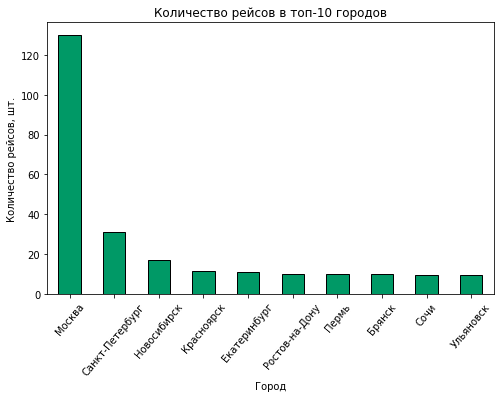

,city,average_flights
0,Москва,129.774194
1,Санкт-Петербург,31.161290
2,Новосибирск,17.322581
3,Красноярск,11.580645
4,Екатеринбург,11.322581
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612903
9,Ульяновск,9.580645


In [15]:
# Построим столбчатую диаграмму
df_flt_sort10 = df_flt.sort_values(by='average_flights', ascending=False).head(10)
df_flt_sort10.plot(kind='bar', x=('city'), y=('average_flights'), figsize=(8, 5), color='#009966',
                   label='Объем', edgecolor = 'black')

# Декорации
plt.title('Количество рейсов в топ-10 городов')
plt.xlabel('Город')
plt.xticks(rotation=50)
plt.ylabel('Количество рейсов, шт.')
plt.legend().remove()
plt.show()

# Посмотрим цифры
display(df_flt_sort.head(10).reset_index(drop=True))

#### Выводы:
- Количество рейсов значительно отличается в первой тройке лидеров - 1 место (129,77) больше 3-го (17,32) почти в 8 раз
- С 4 по 10 место среднее количество рейсов в день очень близко - от 9,58 до 11,32 
- Город Сочи имеет численность примерно в 2 раза меньше, чем г. Ульяновск, но принимает сопоставимое количество рейсов

# 2. Проверка гипотезы

<a id='the_part_2.1'></a>
### 2.1 Формирование данных

In [16]:
# Выделяем полеты в период фестивалей
df_tic_fest = df_tic[~df_tic['festival_week'].isnull()]

# Выделяем полеты в период без фестивалей
df_tic_nonfest = df_tic[df_tic['festival_week'].isnull()]

In [17]:
# Смотрим на датафрейм с фестивалями
df_tic_fest

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


In [18]:
# Смотрим на датафрейм без фестивалей
df_tic_nonfest

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


<a id='the_part_2.2'></a>
### 2.2 Формулировка гипотез и проверка

#### Нулевая гипотеза H0:
Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

#### Альтернативная гипотеза H1:
Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время


Пороговое значение alpha зададим стандартным - 5 %.

In [19]:
# Проверим гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам
alpha = .05 # критический уровень статистической значимости
results = st.mannwhitneyu(df_tic_fest['ticket_amount'].values, df_tic_nonfest['ticket_amount'].values, alternative='two-sided')

# Печатаем p-значение
print('p-значение:', results.pvalue.round(3))

# Печатаем результат проверки
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.068
Не получилось отвергнуть нулевую гипотезу


#### Вывод:
- Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время

## 3. Заключение

<a id='the_part_3'></a>
### Выводы по исследованию

1. Количество полетов находится в обратной зависимости от размера (дальности полета) самолета, чем крупнее самолет, тем меньше полетов.
2. Количество рейсов в значительной степени зависит от размера города, чем больше город, тем больше количество рейсов.
3. Количество рейсов по городам значительно отличается в первой тройке лидеров - 1 место (Москва, в среднем 129,77 рейсов в день) больше 3-го (Новосибирск, в среднем 17,32 рейса в день) почти в 8 раз.
4. Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время. Вероятная причина - доля пассажиров следующих на фестиваль незначительна в общем пассажиропотоке.